# **Description:**

## **Abstract:**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## **Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## **Attribute Information:**
**Bank client data:**  
`0.` Age (numeric)  
`1.` Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')  
`2.` Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)  
`3.` Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')  
`4.` Default: has credit in default? (categorical: 'no', 'yes', 'unknown')  
`5.` Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')  
`6.` Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')  
**Related with the last contact of the current campaign:**  
`7.` Contact: contact communication type (categorical:
'cellular','telephone')  
`8.` Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')  
`9.` Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')  
`10.` Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.  
**Other attributes:**  
`11.` Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)  
`12.` Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)  
`13.` Previous: number of contacts performed before this campaign and for
this client (numeric)  
`14.` Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')  
**Social and economic context attributes:**  
`15.` Emp.var.rate: employment variation rate - quarterly indicator
(numeric)  
`16.` Cons.price.idx: consumer price index - monthly indicator (numeric)  
`17.` Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)  
`18.` Euribor3m: euribor 3 month rate - daily indicator (numeric)  
`19.` Nr.employed: number of employees - quarterly indicator (numeric)  
**Output variable (desired target):**  
`20.` y - has the client subscribed a term deposit? (binary: 'yes', 'no')  
## **Missing Attribute Values:**  
 There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.
## **Source:**
*Dataset from :* http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#  
*Kaggle:* https://www.kaggle.com/henriqueyamahata/bank-marketing

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.figure_factory import create_table

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from scipy import stats

# Load and describe data:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/PBL/Data/bank-additional-full.csv'
df = pd.read_csv(path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
print('Number of duplicate entries: ', df.duplicated().sum())

Number of duplicate entries:  12


In [ ]:
df.drop_duplicates(keep=False,inplace=True)
print('Number of duplicate entries: ', df.duplicated().sum())
print('Number of clients: ', df.shape[0])
print('Number of variables include "y": ', df.shape[1])

Number of duplicate entries:  0
Number of clients:  41164
Number of variables include "y":  21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41164 non-null  int64  
 1   job             41164 non-null  object 
 2   marital         41164 non-null  object 
 3   education       41164 non-null  object 
 4   default         41164 non-null  object 
 5   housing         41164 non-null  object 
 6   loan            41164 non-null  object 
 7   contact         41164 non-null  object 
 8   month           41164 non-null  object 
 9   day_of_week     41164 non-null  object 
 10  duration        41164 non-null  int64  
 11  campaign        41164 non-null  int64  
 12  pdays           41164 non-null  int64  
 13  previous        41164 non-null  int64  
 14  poutcome        41164 non-null  object 
 15  emp.var.rate    41164 non-null  float64
 16  cons.price.idx  41164 non-null  float64
 17  cons.conf.idx   41164 non-null 

`unknown` được mã hóa từ NaN.

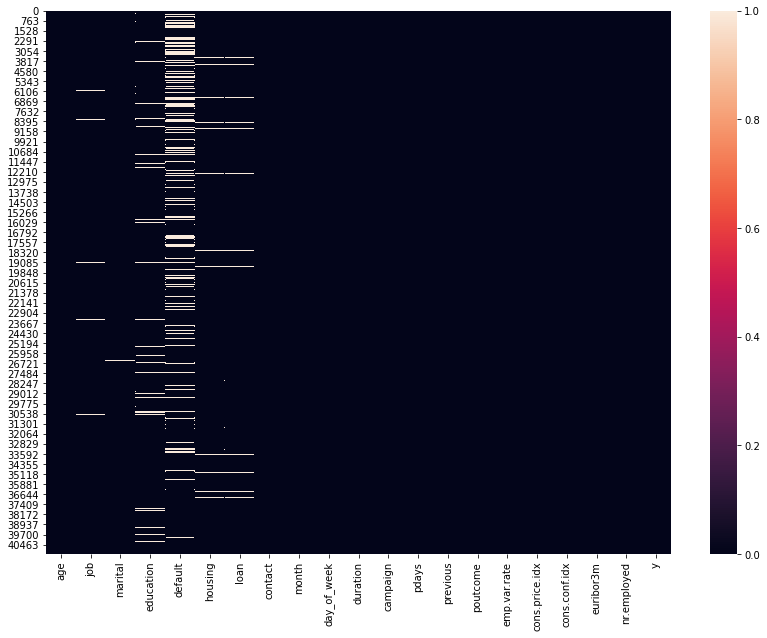

In [ ]:
df.replace('unknown', np.nan, inplace=True)

plt.figure(figsize=(14, 10))
sns.heatmap(df.isna())
plt.show()

In [ ]:
df_nan = df.isna().sum().to_frame()
df_nan[(df_nan > 0).all(axis=1)]

,0
job,330
marital,80
education,1729
default,8595
housing,990
loan,990


In [ ]:
df.dropna(subset=['job', 'marital'], inplace=True)

In [ ]:
lst_col = ['education', 'housing', 'loan']
for col in lst_col:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df['default'].replace(np.nan, 'unknown', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40763 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40763 non-null  int64  
 1   job             40763 non-null  object 
 2   marital         40763 non-null  object 
 3   education       40763 non-null  object 
 4   default         40763 non-null  object 
 5   housing         40763 non-null  object 
 6   loan            40763 non-null  object 
 7   contact         40763 non-null  object 
 8   month           40763 non-null  object 
 9   day_of_week     40763 non-null  object 
 10  duration        40763 non-null  int64  
 11  campaign        40763 non-null  int64  
 12  pdays           40763 non-null  int64  
 13  previous        40763 non-null  int64  
 14  poutcome        40763 non-null  object 
 15  emp.var.rate    40763 non-null  float64
 16  cons.price.idx  40763 non-null  float64
 17  cons.conf.idx   40763 non-null 

In [ ]:
# Numerical data:
df_numerical = df.select_dtypes([np.number])
num_columns = df_numerical.columns.to_list()
df_numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40763.000000,40763.000000,40763.000000,40763.000000,40763.000000,40763.000000,40763.000000,40763.000000,40763.000000,40763.000000
mean,39.978265,258.392071,2.566690,962.704070,0.172975,0.080588,93.574916,-40.516309,3.619536,5167.015752
std,10.400989,259.322247,2.768719,186.346187,0.494991,1.569976,0.578556,4.626120,1.734395,72.231500
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


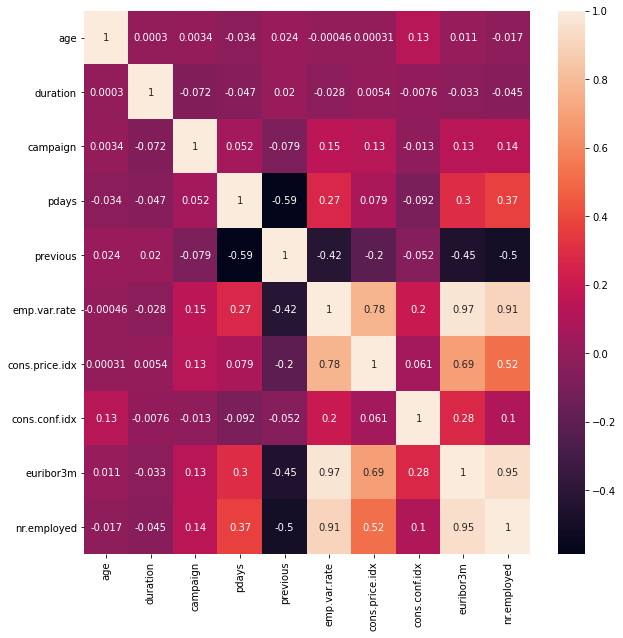

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_numerical.corr(), annot=True)
plt.show()

`1` Hệ số tương quan thấp nhất là -0.58.  
`2` Các thành phần tương quan cao với nhau: `emp.var.rate`, `euribor3m`, `nr.employed.`

In [ ]:
# categorical data:
df_categorical = df.select_dtypes(include='object')
cat_columns = df_categorical.columns.to_list()
df_categorical.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40763,40763,40763,40763,40763,40763,40763,40763,40763,40763,40763
unique,11,3,7,3,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10402,24680,13682,32326,22350,34580,25910,13615,8520,35193,36171


Number of clients that haven't subscribed:  36171
Number of clients that haven subscribed:  4592


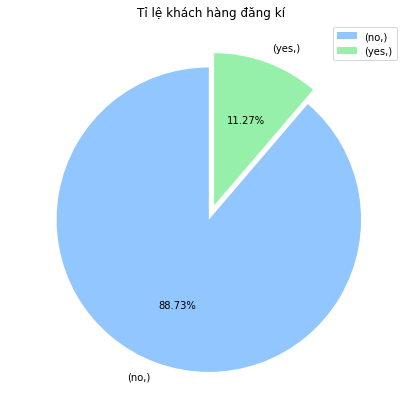

In [ ]:
print("Number of clients that haven't subscribed: ", df[df['y']=='no']['y'].count())
print("Number of clients that haven subscribed: ", df[df['y']=='yes']['y'].count())
df_y = df[['y']].value_counts().to_frame()
plt.style.use('seaborn-pastel')
df_y.plot(kind='pie', autopct='%1.2f%%', subplots=True, figsize=(7, 7), startangle=90, explode= (0.05, 0.05))
plt.title('Tỉ lệ khách hàng đăng kí')
plt.ylabel(' ')
plt.show()

`1` Dữ liệu bị mất cân bằng cao.  
`2` Tỉ lệ 'no' cao gấp 8 lần 'yes'.

# EDA:

## Bank client data:

### 1. Age:

In [ ]:
def num_label(x):
  n = df[df[x]=='unknown'][x].count()
  print('Number of "unknown" labels: ', n)

num_label('age')

Number of "unknown" labels:  0


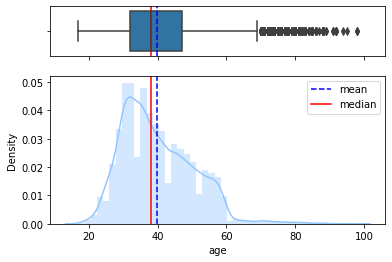

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['age'].mean()
median=df['age'].median()

plt.style.use('default')

sns.boxplot(df['age'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['age'], ax=ax_hist, bins=45)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

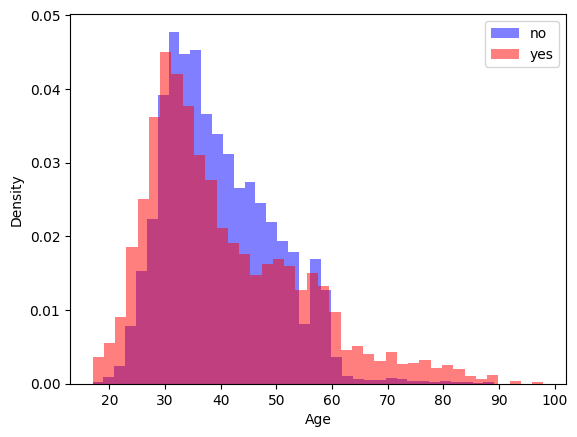

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, :1]), bins=40, color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, :1]), bins=40, color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('Age')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

In [ ]:
def get_outliers(x):
  above = df[x].quantile(q=0.75) + 1.5*(df[x].quantile(q=0.75)-df[x].quantile(q=0.25))
  print('%s above: ' % x, round(above, 2))
  print('Number of outliers: ', df[df[x] > above][x].count())
  print('Outliers rate: ', round(df[df[x] > above][x].count()/len(df)*100, 2), '%', '\n')

def get_cv_rate(x):
  print('Mean: ', round(df[x].mean(), 2))
  print('Standard deviation: ', round(df[x].std(), 2))
  print('Coefficient variation rate: ', round(df[x].std()/df[x].mean()*100, 2), '%') # Hệ số biến thiên

In [ ]:
get_outliers('age')
get_cv_rate('age')

age above:  69.5
Number of outliers:  461
Outliers rate:  1.13 % 

Mean:  39.98
Standard deviation:  10.4
Coefficient variation rate:  26.02 %


In [ ]:
df['age'].describe()

count    40763.000000
mean        39.978265
std         10.400989
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [ ]:
df.loc[df['age'] <= 25, 'age_bin'] = 'young'
df.loc[(df['age']> 25) & (df['age'] <= 60), 'age_bin'] = 'middle-aged'
df.loc[df['age'] > 60, 'age_bin'] = 'elderly'

In [ ]:
def get_yes_rate(x):
  lst = df[x].unique().tolist()
  names=[]
  pcts=[]
  for i in lst:
    names.append(i)
    pcts.append(df[(df[x]==i)&(df['y']=='yes')][x].count()/df[df[x]==i][x].count()*100)
  for j in range(len(names)):
    print('%s sub-rate: ' % names[j], round(pcts[j], 2), '%')

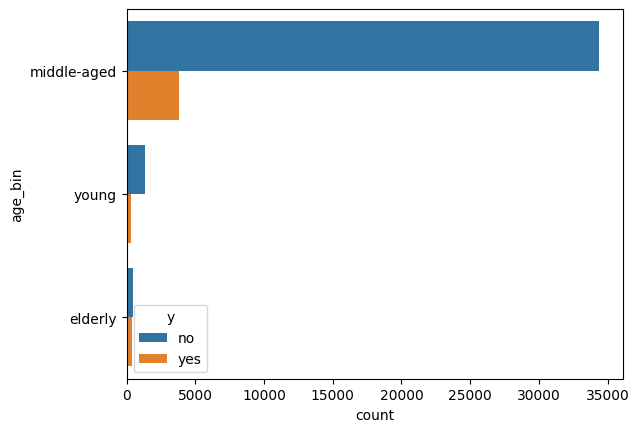

In [ ]:
ax=sns.countplot(data=df, y='age_bin', hue='y')

In [ ]:
get_yes_rate('age_bin')

middle-aged sub-rate:  10.06 %
young sub-rate:  20.74 %
elderly sub-rate:  45.76 %


`1` Độ tuổi khách hàng từ $[17; 98]$ phần nhiều trong khoảng $[30; 60]$.    
`2` Outliers chiếm khoảng 1.07% và giá trị đều chấp nhận được -> Không xử lý.  
`3` Hệ số biến thiên là 25.81% -> độ tuổi phân tán trung bình cao.  
`4` Tỉ lệ người cao tuổi đăng kí là 45.59%.  
`5` Người trung niên chiếm tỉ lệ ít nhất 10.04%.  

### 2. Job:

In [ ]:
num_label('job')

Number of "unknown" labels:  0


In [ ]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
df['job'].replace('admin.', 'admin', inplace=True)

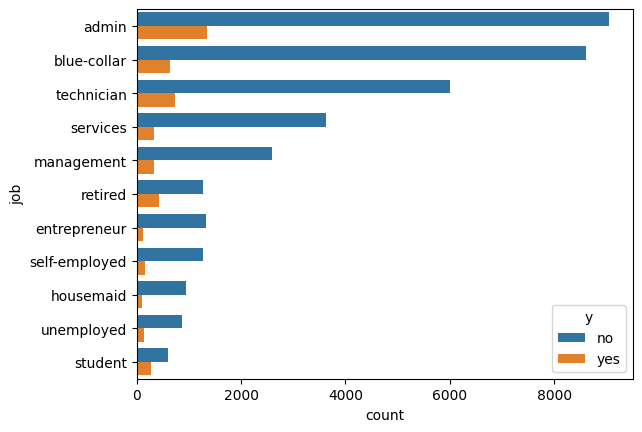

In [ ]:
sns.countplot(data = df, y='job', order = df['job'].value_counts().index, hue='y')
plt.show()

In [ ]:
get_yes_rate('job')

housemaid sub-rate:  10.03 %
services sub-rate:  8.16 %
admin sub-rate:  12.96 %
blue-collar sub-rate:  6.87 %
technician sub-rate:  10.83 %
retired sub-rate:  25.31 %
management sub-rate:  11.23 %
unemployed sub-rate:  14.27 %
self-employed sub-rate:  10.52 %
entrepreneur sub-rate:  8.47 %
student sub-rate:  31.46 %


y                     no        yes
job                                
admin          38.225094  37.951780
blue-collar    39.578054  39.211024
entrepreneur   41.712782  42.024390
housemaid      44.720294  52.650943
management     42.299653  42.783537
retired        59.946792  68.258661
self-employed  40.179953  38.006711
services       38.085534  36.077399
student        26.390651  24.800000
technician     38.611343  37.767857
unemployed     39.802312  39.062500


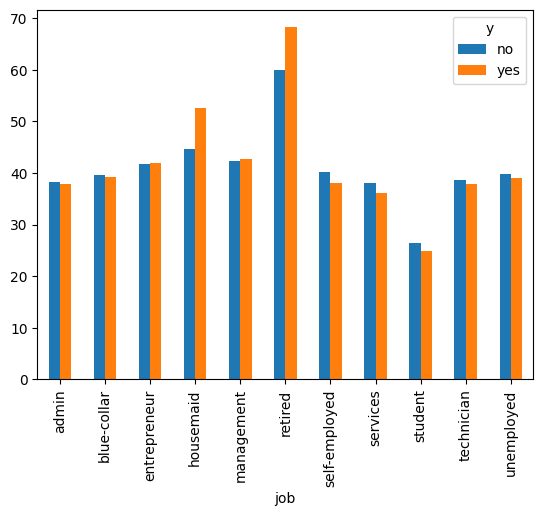

In [ ]:
job_pivot = df.pivot_table(columns='y', index='job', values='age', aggfunc=np.mean)
print(job_pivot)

job_pivot.sort_values(by=['job'], ascending=True).plot(kind='bar');

`1` Các công việc chiếm số lượng cao: `admin`, `blue-collar`, `technician`  
`2` Các công việc chiến tỉ lệ yes cao: `student`, `retiredd`  
`3` -> Những người không có thu nhập, hoặc thu nhập thấp có xu hướng sẽ đồng ý.

### 3. Marital:

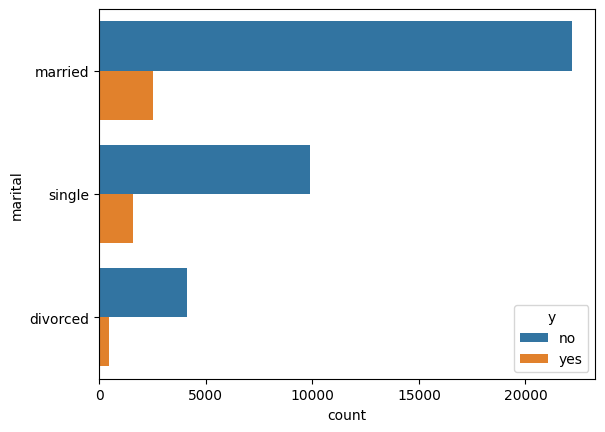

In [ ]:
sns.countplot(data = df, y='marital', order = df['marital'].value_counts().index, hue='y')
plt.show()

In [ ]:
get_yes_rate('marital')

married sub-rate:  10.19 %
single sub-rate:  13.97 %
divorced sub-rate:  10.29 %


y                no        yes
marital                       
divorced  44.320078  49.775899
married   41.909997  45.256165
single    33.420504  31.361371


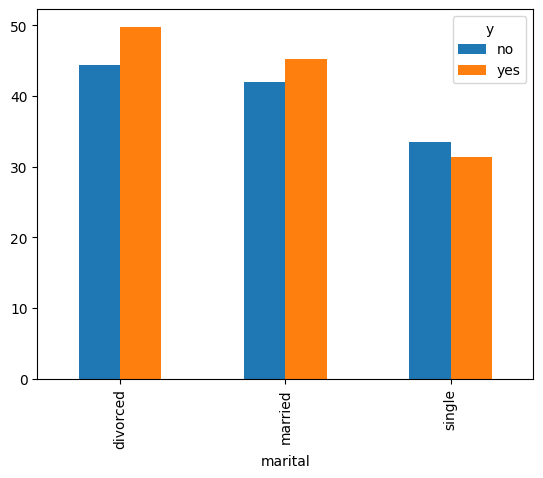

In [ ]:
marital_pivot = df.pivot_table(columns='y', index='marital', values='age', aggfunc=np.mean)
print(marital_pivot)
marital_pivot.plot(kind='bar')

`1` Chủ yếu khách hàng đang trong tình trạng đã kết hôn (20842).  
`2` Tỉ lệ yes của cả ba trạng thái hôn nhân không chênh lệch nhiều.     

### 4. Education:

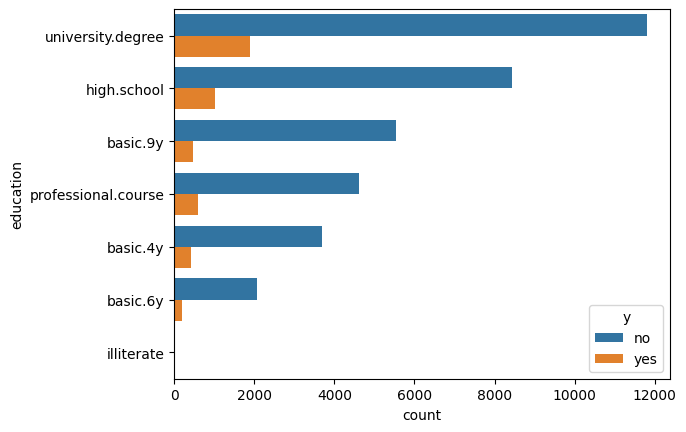

In [ ]:
sns.countplot(data = df, y='education', order = df['education'].value_counts().index, hue='y')
plt.show()

In [ ]:
get_yes_rate('education')

basic.4y sub-rate:  10.27 %
high.school sub-rate:  10.87 %
basic.6y sub-rate:  8.27 %
basic.9y sub-rate:  7.83 %
professional.course sub-rate:  11.38 %
university.degree sub-rate:  13.78 %
illiterate sub-rate:  22.22 %


y                           no        yes
education                                
basic.4y             46.331529  58.307329
basic.6y             40.430843  40.315508
basic.9y             39.063042  38.859574
high.school          38.041281  37.531128
illiterate           47.571429  51.750000
professional.course  39.960000  41.047138
university.degree    39.375212  39.244433


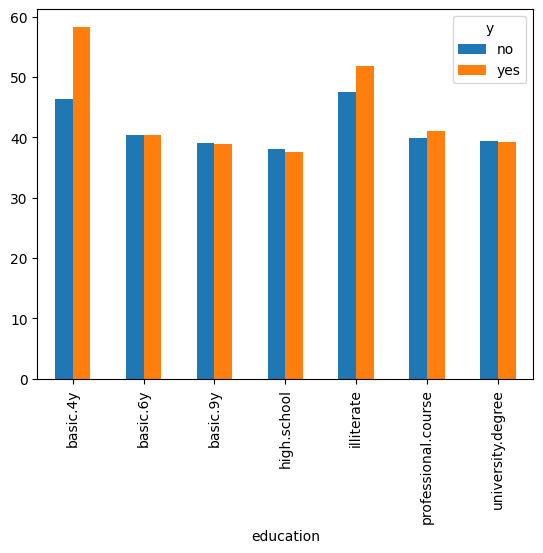

In [ ]:
edu_pivot = df.pivot_table(columns='y', index='education', values='age', aggfunc=np.mean)
print(edu_pivot)
edu_pivot.plot(kind='bar')

`1` Các bậc chiếm số lượng cao: `high.school`, `university.degree`.   
`2` Số lượng `illiterate` rất thấp, nhưng tỉ lệ đồng ý lại rất cao.  
`3` Tỉ lệ đồng ý của `university.degree` cao thứ 2, các học vị còn lại không chênh lệch nhiều.  

### 4. Default, housing and loan:

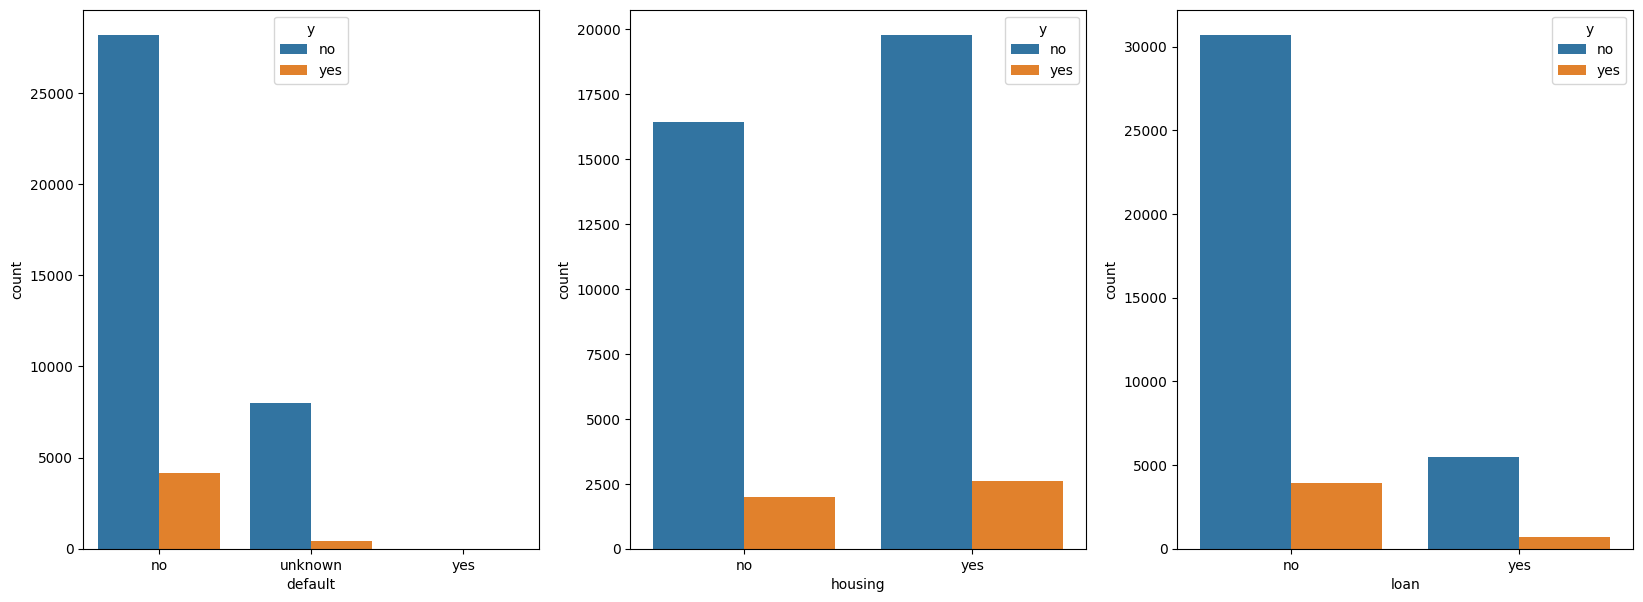

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
sns.countplot(data=df, x='default', hue='y', ax=ax[0])
sns.countplot(data=df, x='housing', hue='y', ax=ax[1])
sns.countplot(data=df, x='loan', hue='y', ax=ax[2])
fig.show()

In [ ]:
print(df['default'].value_counts())
get_yes_rate('default')

no         32326
unknown     8434
yes            3
Name: default, dtype: int64
no sub-rate:  12.86 %
unknown sub-rate:  5.17 %
yes sub-rate:  0.0 %


**Default:**  
`1` Số lượng vỡ nợ rất thấp (3 người) và họ đều không đăng kí.    
`2` Có 11.14% người không vỡ nợ đăng kí. 

In [ ]:
get_yes_rate('housing')

no sub-rate:  10.87 %
yes sub-rate:  11.59 %


**Housing:**  
`1` Tỉ lệ đã có hoặc không khoản vay nhà ở không chênh lệch nhiều.  
`2` Không thể dự đoán y với chỉ mỗi housing.

In [ ]:
get_yes_rate('loan')

no sub-rate:  11.32 %
yes sub-rate:  10.97 %


**Loan:**  
`1` Số lượng chưa có khoản vay cá nhân chênh lệch nhiều nhưng điều đó không ảnh hưởng đến quyết định của người đó.    
`2` Không thể dự đoán y chỉ với mỗi loan.

## Related with the last contact of the current campaign:

### 1. Contact:

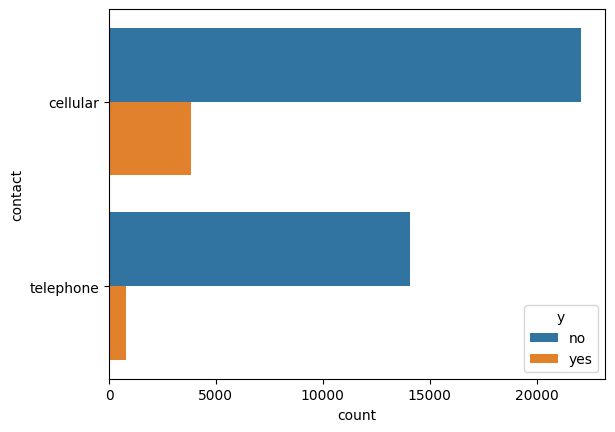

In [ ]:
sns.countplot(data = df, y='contact', order = df['contact'].value_counts().index, hue='y')
plt.show()

In [ ]:
print(df['contact'].value_counts())
get_yes_rate('contact')

cellular     25910
telephone    14853
Name: contact, dtype: int64
telephone sub-rate:  5.22 %
cellular sub-rate:  14.73 %


`1` Số lượng người sử dụng di động và tỉ lệ họ đồng ý cao hơn so với điện thoại bàn.



### 2. Month, Dayofweek:

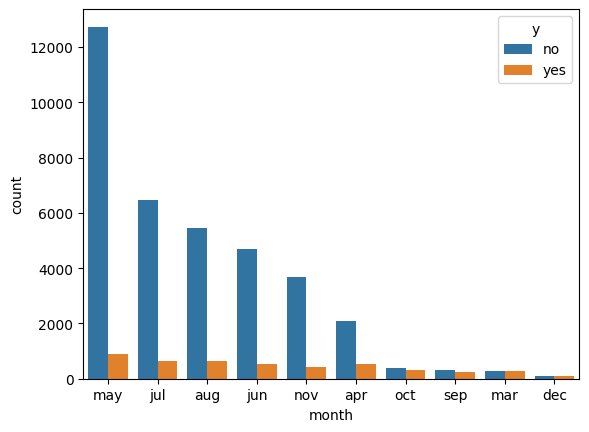

In [ ]:
sns.countplot(data = df, x='month', order = df['month'].value_counts().index, hue='y')
plt.show()

In [ ]:
get_yes_rate('month')

may sub-rate:  6.48 %
jun sub-rate:  10.45 %
jul sub-rate:  9.0 %
aug sub-rate:  10.58 %
oct sub-rate:  44.11 %
nov sub-rate:  10.11 %
dec sub-rate:  48.89 %
mar sub-rate:  50.65 %
apr sub-rate:  20.51 %
sep sub-rate:  45.02 %


`1` Các tháng có tỉ lệ đồng ý cao: `mar`, `dec`, `sep`, `oct` nhưng tổng số lượng liên hệ trong những tháng này lại rất ít.  
`2` Những tháng còn lại thì số lượng nhiều hơn nhưng tỉ lệ đồng ý lại thấp hơn rất nhiều.(số lượng đồng ý ở những tháng này nhiều)  
`3` Các tháng không có trong bộ dữ liệu: `jan`, `feb` có thể do không có ghi chép hoặc không có chiến dịch.

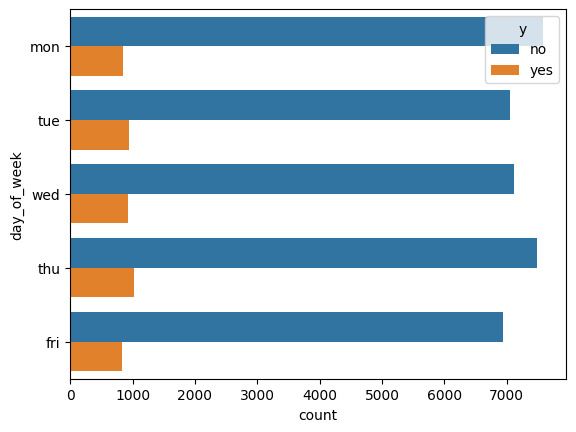

In [ ]:
sns.countplot(data = df, y='day_of_week', hue='y')
plt.show()

In [ ]:
get_yes_rate('day_of_week')

mon sub-rate:  9.99 %
tue sub-rate:  11.83 %
wed sub-rate:  11.61 %
thu sub-rate:  12.1 %
fri sub-rate:  10.79 %


`1` Mọi ngày đều có số lượng liên hệ và tỉ lệ đồng ý khá đồng đều.

### 3. Duration:  
*Chỉ phân tích, không có ý nghĩa cho mô hình dự đoán. Vì thời lượng cuộc gọi không được biết trước.*

In [ ]:
df.duration = round(df.duration/60, 2) # đổi giây sang phút
df['duration'].describe()

count    40763.000000
mean         4.306557
std          4.322038
min          0.000000
25%          1.700000
50%          3.000000
75%          5.330000
max         81.970000
Name: duration, dtype: float64

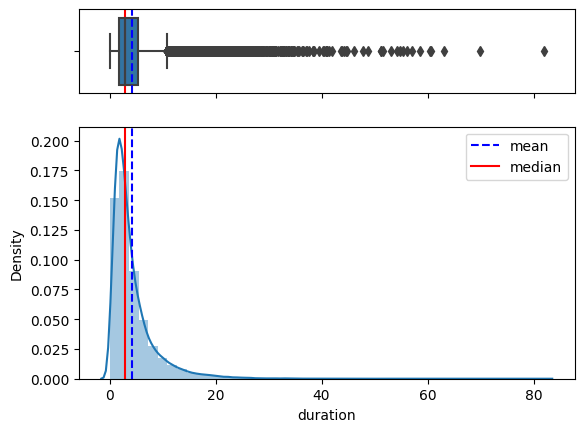

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['duration'].mean()
median=df['duration'].median()


sns.boxplot(df['duration'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['duration'], ax=ax_hist, bins=45)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

In [ ]:
get_outliers('duration')

duration above:  10.78
Number of outliers:  2922
Outliers rate:  7.17 % 



In [ ]:
df.loc[df['duration'] > 10.75, 'duration'] = np.nan

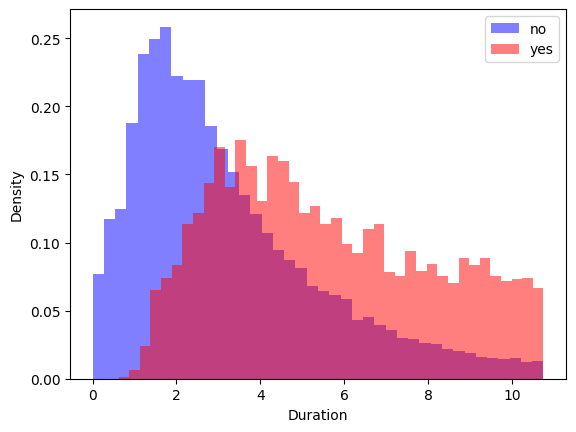

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 10:11]), bins=40, color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 10:11]), bins=40, color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

In [ ]:
IQR = df['duration'].quantile(q=0.75) - df['duration'].quantile(q=0.25)
print("First quartile: ", df['duration'].quantile(q=0.25))
print("Second quartile: ", df['duration'].quantile(q=0.5))
print("Third quartile: ", df['duration'].quantile(q=0.75))
print("Inter quartile range: ", IQR)

First quartile:  1.62
Second quartile:  2.78
Third quartile:  4.62
Inter quartile range:  3.0


In [ ]:
df[df['duration']==0]['y'] # các hàng có duration = 0

6251     no
23031    no
28063    no
33015    no
Name: y, dtype: object

In [ ]:
df.drop(['duration'], axis=1, inplace=True)

`1` Cuộc gọi trên 10.75 phút được cho là ngoại lai.  
`2` Các cuộc gọi sẽ xoay quanh 3p và tập trung nhiều trong khoảng IQR.  
`3` Các cuộc gọi dưới 3p có xu hướng không đăng kí, còn trên 3 phút tỉ lệ đăng kí cao hơn.

## Other attributes:

### 1. Campaign:  

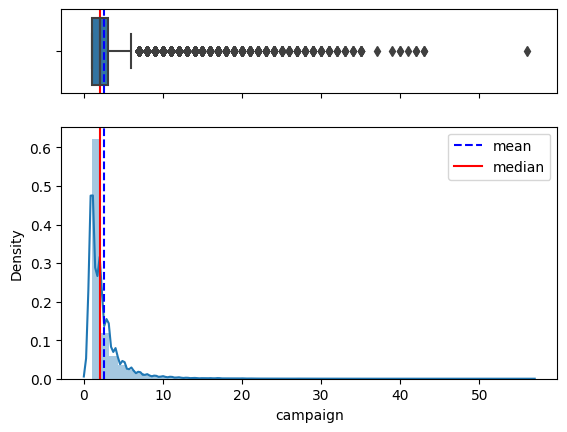

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['campaign'].mean()
median=df['campaign'].median()

sns.boxplot(df['campaign'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['campaign'], ax=ax_hist)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

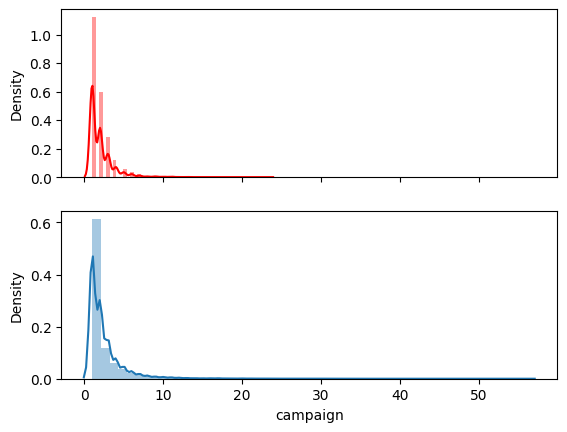

In [ ]:
f, (ax_1, ax_2) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (3, 3)})

sns.distplot(df[df['y']=='yes']['campaign'], ax=ax_1, color='r')
sns.distplot(df[df['y']=='no']['campaign'], ax=ax_2)

plt.show()

In [ ]:
get_outliers('campaign')

campaign above:  6.0
Number of outliers:  2372
Outliers rate:  5.82 % 



In [ ]:
df['campaign'] = df['campaign'].apply(lambda x:6 if x>6 else x)

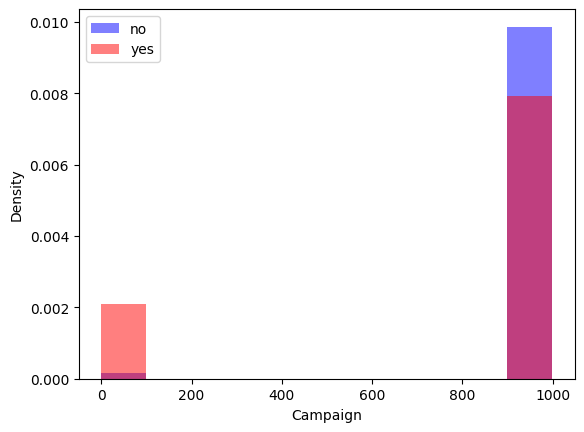

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 11:12]), color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 11:12]), color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('Campaign')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

`1` Việc đăng kí hay không có vẻ như không bị ảnh hưởng nhiều với `campaign`

### 2. Pdays:

In [ ]:
df['pdays'].value_counts().sort_index()

0         15
1         25
2         59
3        431
4        116
5         46
6        404
7         60
8         17
9         64
10        52
11        27
12        58
13        35
14        20
15        24
16        10
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39273
Name: pdays, dtype: int64

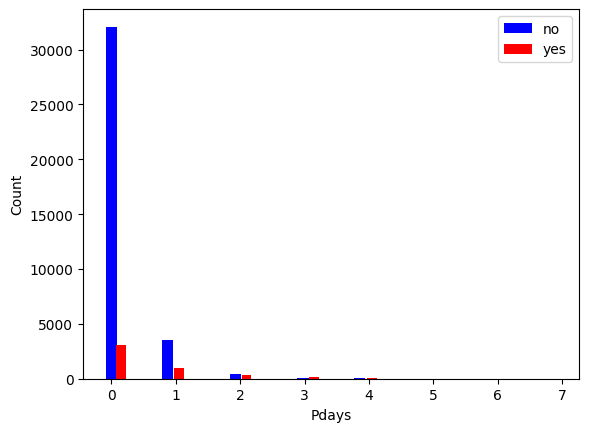

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 12:13]), bins=40, color='b', label='no', align='left')
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 12:13]), bins=40, color='r', label='yes', align='right')
plt.legend(loc='upper_left')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.show()

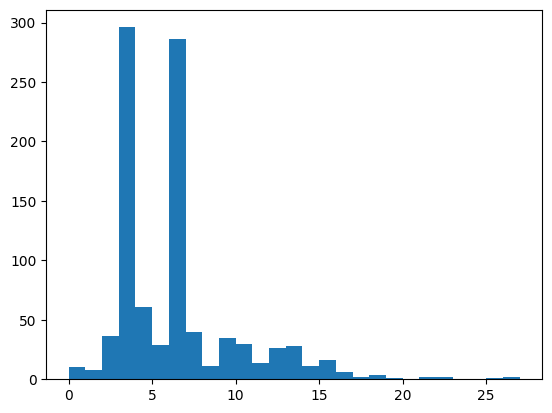

In [ ]:
# Phân tích những khách hàng đã được tiếp cận bởi 1 chiến dịch trước đó
df_1month = df.loc[(df['pdays']!=999) & (df['y']=='yes'), 'pdays']
df_1month.hist(bins=27, grid=False)

In [ ]:
df_1month.describe()

count    957.000000
mean       5.919540
std        3.737574
min        0.000000
25%        3.000000
50%        6.000000
75%        6.000000
max       27.000000
Name: pdays, dtype: float64

`1.` Hầu hết ở chiến dịch trước đó, mọi người sẽ trả lời có đăng kí hay không sau 4 hoặc 7 ngày.  

### 3. Previous:

In [ ]:
df['previous'].value_counts()

0    35193
1     4522
2      740
3      214
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

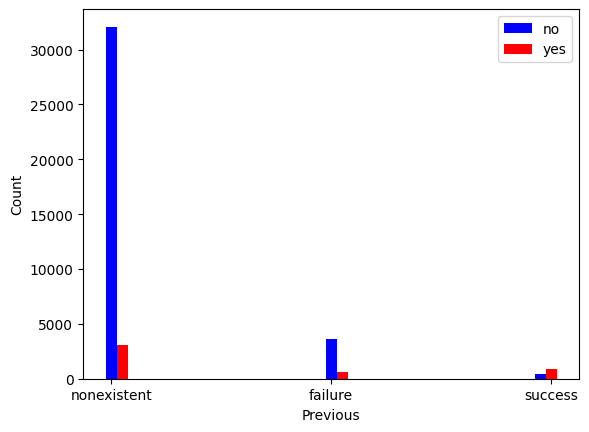

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 13:14]), bins=40, color='b', label='no', align='left')
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 13:14]), bins=40, color='r', label='yes', align='right')
plt.legend(loc='best')
plt.xlabel('Previous')
plt.ylabel('Count')
plt.show()

In [ ]:
get_yes_rate('previous')

0 sub-rate:  8.84 %
1 sub-rate:  21.19 %
2 sub-rate:  46.08 %
3 sub-rate:  59.35 %
4 sub-rate:  54.29 %
5 sub-rate:  72.22 %
6 sub-rate:  60.0 %
7 sub-rate:  0.0 %


`1` Những người đã từng được liên hệ trước đó có tỉ lệ đăng kí rất cao.  
`2` Những người chưa liên hệ thì chỉ đăng kí khoảng 8.84%.

### 4. Poutcome:

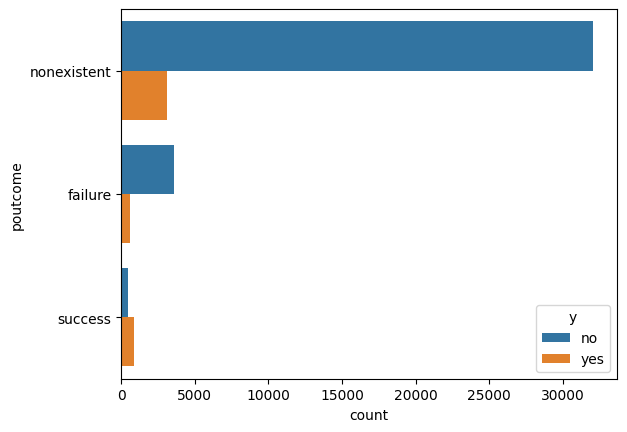

In [ ]:
sns.countplot(data = df, y='poutcome', order = df['poutcome'].value_counts().index, hue='y')
plt.show()

In [ ]:
get_yes_rate('poutcome')

nonexistent sub-rate:  8.84 %
failure sub-rate:  14.1 %
success sub-rate:  65.6 %


`1` Nếu chiến dịch trước thành công, khả năng cao khách hàng sẽ tiếp tục đăng kí trong đợt này.

## Social and economic context attributes:

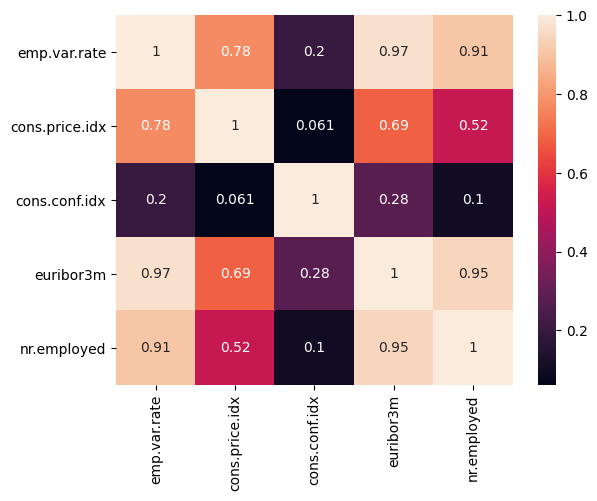

In [ ]:
sns.heatmap(df[['emp.var.rate', 'cons.price.idx',	'cons.conf.idx', 'euribor3m', 'nr.employed']].corr(), annot=True)
plt.show()

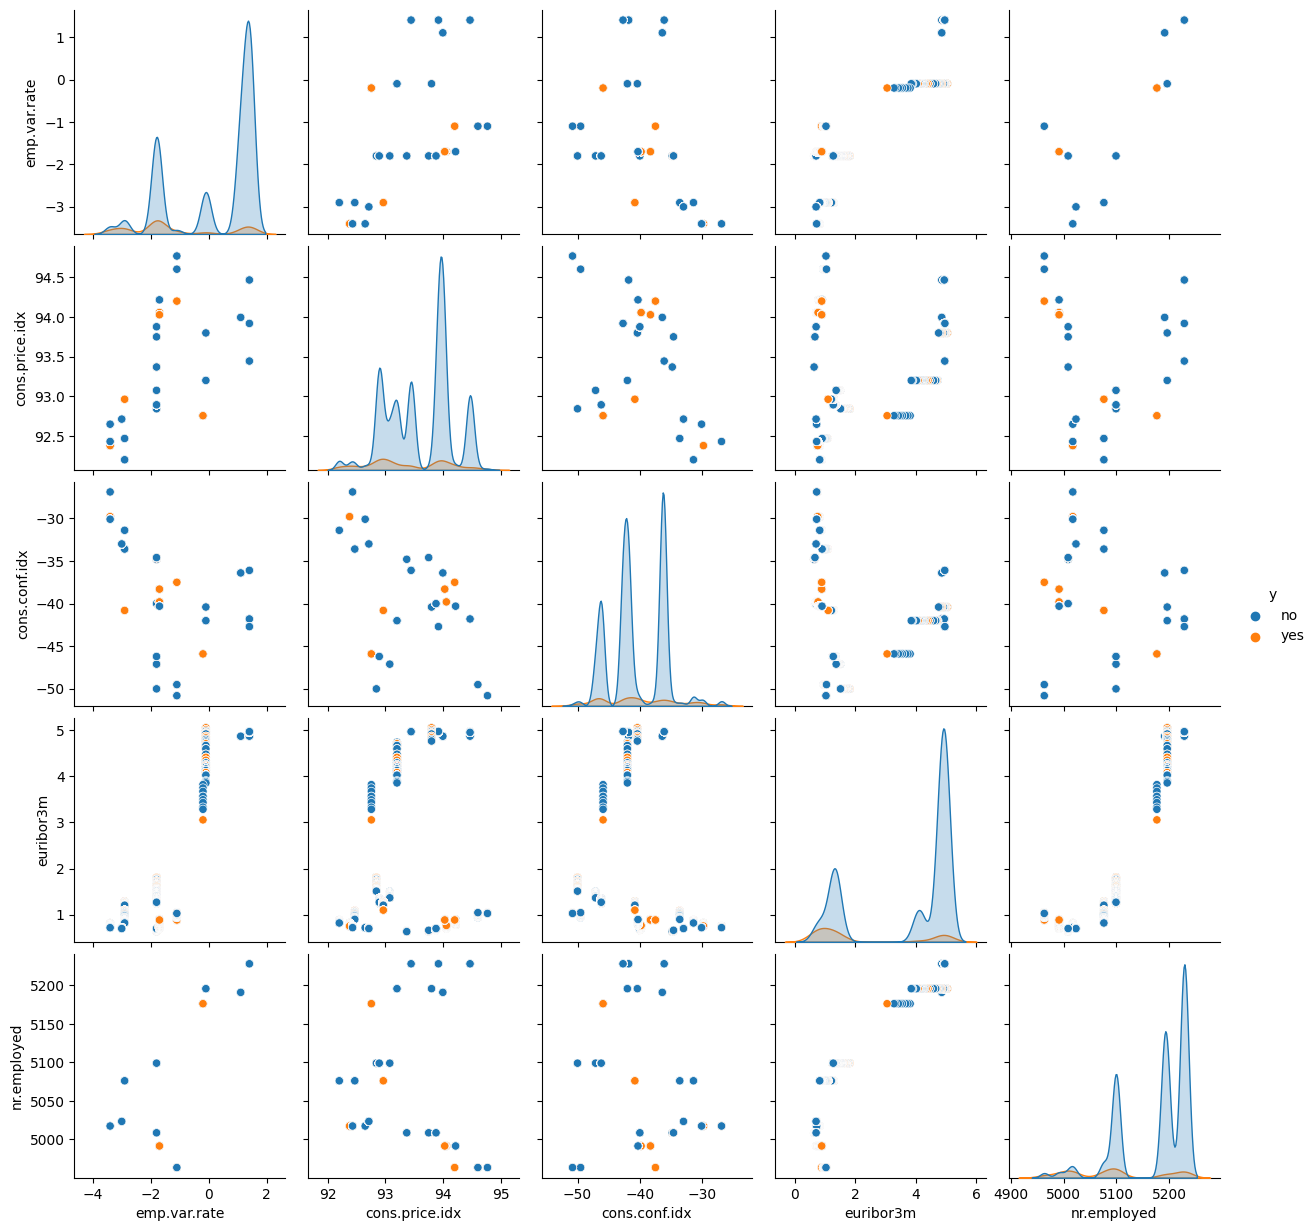

In [ ]:
sns.pairplot(data=df[['emp.var.rate', 'cons.price.idx',	'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']], hue='y')
plt.show()

### Emp.var.rate:

In [ ]:
df['emp.var.rate'].value_counts().sort_index()

-3.4     1051
-3.0      170
-2.9     1636
-1.8     9124
-1.7      763
-1.1      631
-0.2       10
-0.1     3670
 1.1     7650
 1.4    16058
Name: emp.var.rate, dtype: int64

Bins 25

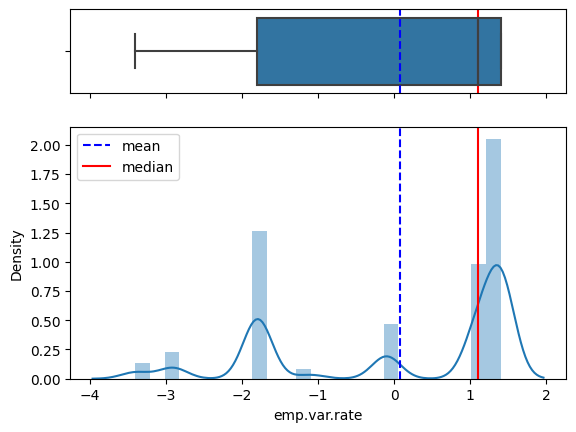

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['emp.var.rate'].mean()
median=df['emp.var.rate'].median()

sns.boxplot(df['emp.var.rate'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['emp.var.rate'], ax=ax_hist, bins=25)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

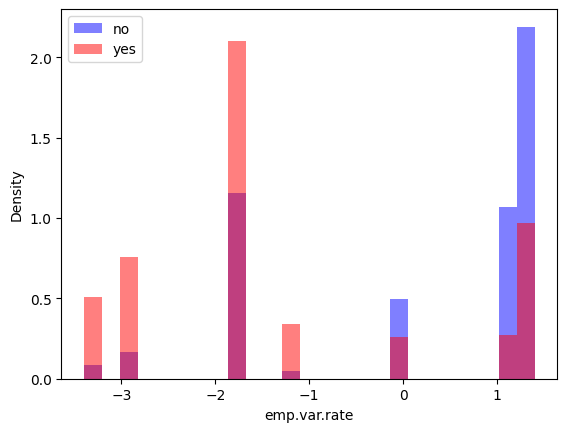

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 14:15]), bins=25, color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 14:15]), bins=25, color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('emp.var.rate')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

`1` `emp.var.rate` càng thấp thì tỉ lệ khách hàng đăng kí càng cao, ngược lại thì chỉ số này càng cao thì tỉ lệ đăng kí càng thấp.

### Cons.price.idx:

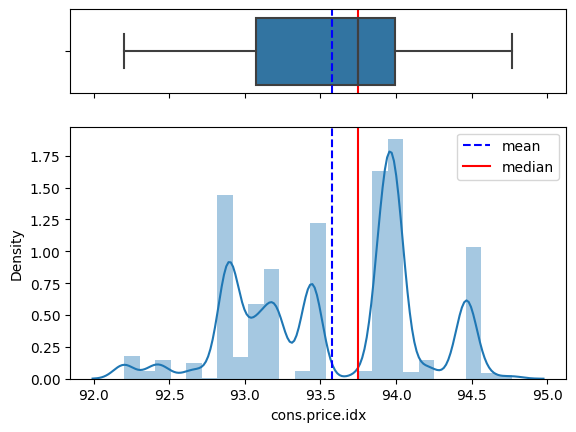

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['cons.price.idx'].mean()
median=df['cons.price.idx'].median()

sns.boxplot(df['cons.price.idx'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['cons.price.idx'], ax=ax_hist, bins=25)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

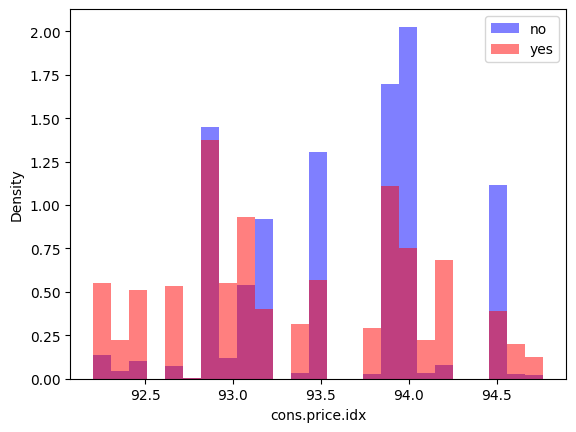

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 15:16]), bins=25, color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 15:16]), bins=25, color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('cons.price.idx')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

`1` Khi `cons.price.idx` tăng cao thì tỉ lệ không đăng kí cũng tăng.  
`2` Tỉ lệ đăng kí chỉ giảm nhẹ khi chỉ số này gần đạt ngưỡng cao nhất.

### Cons.conf.idx:

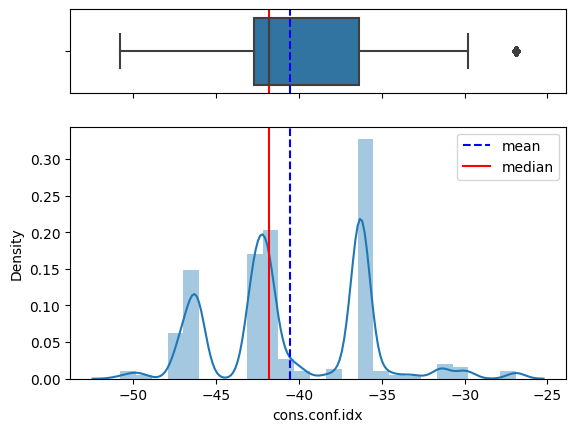

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['cons.conf.idx'].mean()
median=df['cons.conf.idx'].median()

sns.boxplot(df['cons.conf.idx'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['cons.conf.idx'], ax=ax_hist, bins=25)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

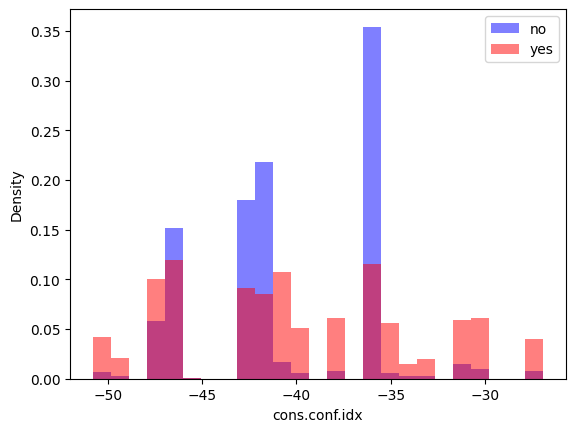

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 16:17]), bins=25, color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 16:17]), bins=25, color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('cons.conf.idx')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

`1` Chỉ số này dường như chẳng ảnh hưởng đến quyết định đăng kí.  
`2` Nhưng nếu chỉ số này thấp thì tỉ lệ không đăng kí sẽ cao hơn.

### Euribor3m:

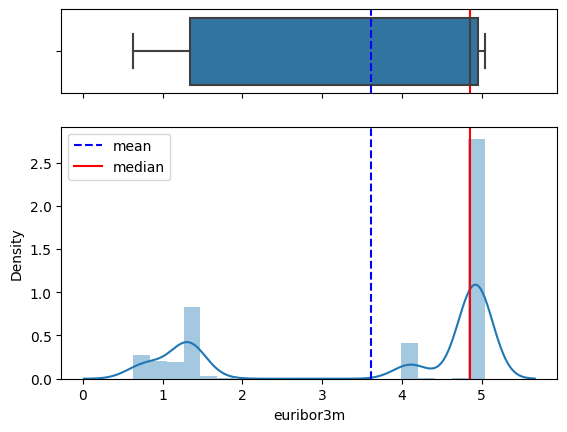

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['euribor3m'].mean()
median=df['euribor3m'].median()

sns.boxplot(df['euribor3m'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['euribor3m'], ax=ax_hist)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

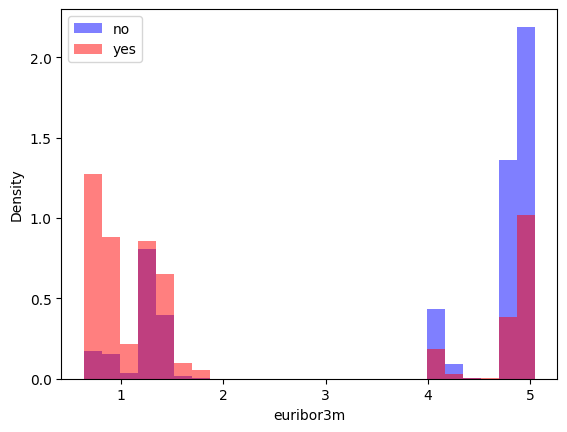

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 17:18]), bins=25, color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 17:18]), bins=25, color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('euribor3m')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

`1` `euribor3m` là mức lãi suất mà các ngân hàng châu Âu áp dụng trên các khoản vay ngắn hạn cho nhau, các ngân hàng sẽ vay tiền từ ngân hàng khác để có thể cung cấp các khoản vay cho khách hàng của mình.  
`2` Từ đó có thể thấy được việc khách hàng có gửi tiết kiệm hay không sẽ ảnh hưởng đến chỉ số `euribor3m` này, nếu khách hàng gửi tiết kiệm nhiều thì ngân hàng sẽ có vốn và sẽ không cần phải vay ngân hàng khác nữa dẫn đến `euribor3m` sẽ giảm theo.  
`3` Link: https://www.euribor-rates.eu/en/euribor-savings/

### Nr.employed:

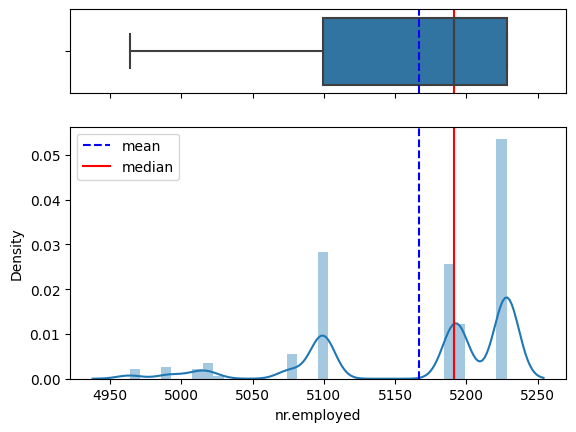

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 3)})
mean=df['nr.employed'].mean()
median=df['nr.employed'].median()

sns.boxplot(df['nr.employed'], ax=ax_box)
ax_box.axvline(mean, color='blue', linestyle='--')
ax_box.axvline(median, color='red')

sns.distplot(df['nr.employed'], ax=ax_hist)
ax_hist.axvline(mean, color='blue', linestyle='--', label='mean')
ax_hist.axvline(median, color='red', label='median')

plt.legend(loc='upper_right')
ax_box.set(xlabel='')
plt.show()

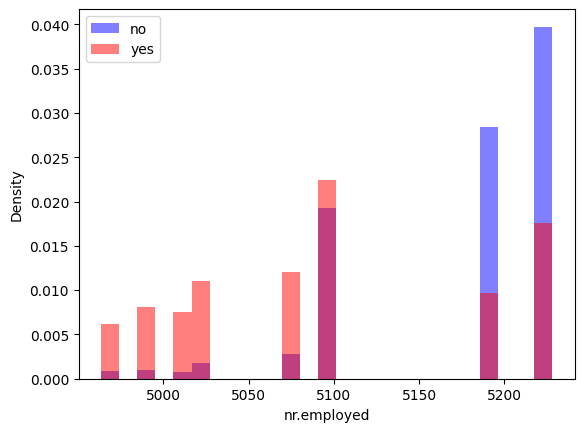

In [ ]:
plt.hist(np.array(df[df['y']=='no'].iloc[:, 18:19]), bins=25, color='b', alpha=0.5, label='no', density=True)
plt.hist(np.array(df[df['y']=='yes'].iloc[:, 18:19]), bins=25, color='r', alpha=0.5, label='yes', density=True)
plt.legend(loc='upper_right')
plt.xlabel('nr.employed')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

`1` Việc tăng `nr.employed` cũng tăng số lượng cuộc gọi nhưng tỉ lệ đăng kí cũng không thay đổi lắm vì với việc phân tích `previous` chúng ta đã biết việc khách hàng đã biết đến chiến dịch trước đó sẽ có tỉ lệ đăng kí cao hơn.  

# Treatment:

In [ ]:
from scipy import stats

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder # Encode theo thứ tự chữ cái.
LE = LabelEncoder()

In [ ]:
df['y'] = df['y'].map({'no':0, 'yes':1})
y = df.y

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 40763, dtype: int64

In [ ]:
df.shape

(40763, 21)

In [ ]:
df_categorical.drop(['y'], axis=1, inplace=True)

In [ ]:
df_categorical = pd.get_dummies(df_categorical)

In [ ]:
df_categorical

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
X= pd.concat([df_numerical, df_categorical], axis = 1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

31579 new random picked points


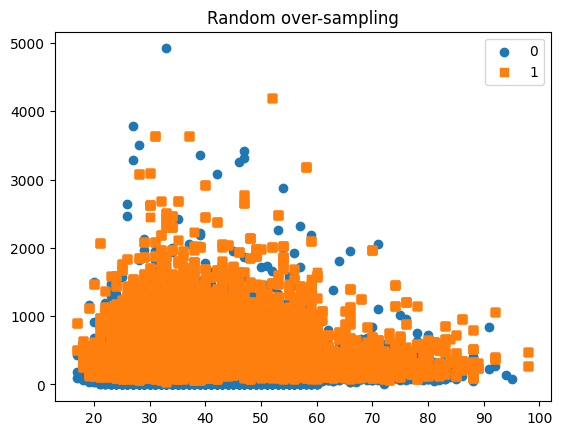

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [ ]:
y1=pd.Series(y)
y1.value_counts()

0    36171
1     4592
Name: y, dtype: int64

# Model:

TP : Khách hàng tiềm năng được dự đoán yes.  
TN : Khách hàng không tiềm năng được dự đoán no.  
FP : Khách hàng không tiềm được dự đoán yes.  
FN : Khách hàng tiềm năng được dự đoán no.

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
Sk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

`1.` "No" cao hơn "Yes" khoảng 8 lần.  
`2.` Số tiền bỏ ra cho việc marketing nhầm sẽ nhỏ hơn rất nhiều so với số lợi nhuận mà ngân hàng có thể mất được nếu bỏ sót một khách hàng tiềm năng. Vì vậy việc nhầm lẫn khách hàng có khả năng sẽ đăng kí ít quan trọng hơn việc dự đoán khách hàng tiềm năng thành không đăng kí.  
`3` Vì vậy chọn **Positive - no** và **Negative - yes** 

In [ ]:
def report(model, X_test, y_test, y_pred):
  cfm = confusion_matrix(y_test, y_pred)
  tp = cfm[0][0]
  fn = cfm[0][1]
  fp = cfm[1][0]
  tn = cfm[1][1]
  p = round(tp/(tp+fp), 4)
  r = round(tp/(tp+fn), 4)
  f1 = round(2*(p*r)/(p+r), 4)
  print('Confusion matrix: \n', cfm)
  print('Precision: ', p)
  print('Recall: ', r)
  print('F1 score:', f1)
  return p, r, f1

## 1. Split and Scale dataset:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 101)

In [ ]:
y1 = pd.Series(y_test)
y1.value_counts()

1    10884
0    10819
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 2. Logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
scores = cross_val_score(logmodel, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
LGCV = scores.mean()

print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, logpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

Accuracy testset: 87.00
Avg scores: 87.26 (+/- 0.33)


In [ ]:
plog, rlog, f1log = report(logmodel, X_test, y_test, logpred)

Confusion matrix: 
 [[9290 1529]
 [1252 9632]]
Precision:  0.8812
Recall:  0.8587
F1 score: 0.8698


## 3. KNN:

k=1, avg scores: 95.73 (+/- 0.20)
k=2, avg scores: 95.18 (+/- 0.29)
k=3, avg scores: 93.33 (+/- 0.28)
k=4, avg scores: 92.56 (+/- 0.27)
k=5, avg scores: 91.50 (+/- 0.37)
k=6, avg scores: 90.77 (+/- 0.37)
k=7, avg scores: 90.18 (+/- 0.34)
k=8, avg scores: 89.59 (+/- 0.31)
k=9, avg scores: 89.32 (+/- 0.32)
k=10, avg scores: 88.94 (+/- 0.41)
k=11, avg scores: 88.84 (+/- 0.48)
k=12, avg scores: 88.73 (+/- 0.43)
k=13, avg scores: 88.59 (+/- 0.41)
k=14, avg scores: 88.54 (+/- 0.36)
k=15, avg scores: 88.44 (+/- 0.31)
k=16, avg scores: 88.32 (+/- 0.26)
k=17, avg scores: 88.34 (+/- 0.33)
k=18, avg scores: 88.26 (+/- 0.36)
k=19, avg scores: 88.28 (+/- 0.43)
k=20, avg scores: 88.26 (+/- 0.42)
k=21, avg scores: 88.21 (+/- 0.39)
k=22, avg scores: 88.11 (+/- 0.41)
k=23, avg scores: 88.11 (+/- 0.40)
k=24, avg scores: 88.03 (+/- 0.36)
k=25, avg scores: 87.96 (+/- 0.42)
k=26, avg scores: 87.78 (+/- 0.41)
k=27, avg scores: 87.80 (+/- 0.42)
k=28, avg scores: 87.72 (+/- 0.38)
k=29, avg scores: 87.80 (+/- 

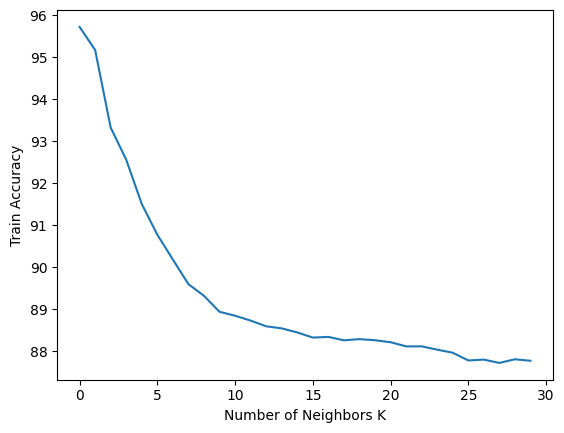

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 101)

neighbors = np.arange(0,30)

cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    scores = cross_val_score(knn, X_trainK, y_trainK, cv=Sk_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d, avg scores: %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
scores = cross_val_score(knn, X_train, y_train, cv=Sk_fold, scoring = 'accuracy')
KNNCV = scores.mean()

print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, knnpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

Accuracy testset: 84.00
Avg scores: 83.43 (+/- 0.51)


In [ ]:
pknn, rknn, f1knn = report(knn, X_test, y_test, knnpred)

Confusion matrix: 
 [[8872 1947]
 [1526 9358]]
Precision:  0.8532
Recall:  0.82
F1 score: 0.8363


## 4. Decision tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
scores = cross_val_score(dtree, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
DTCV = scores.mean()

print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, dtreepred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

Accuracy testset: 96.00
Avg scores: 95.97 (+/- 0.23)


In [ ]:
ptree, rtree, f1tree = report(dtree, X_test, y_test, dtreepred)

Confusion matrix: 
 [[10066   753]
 [   17 10867]]
Precision:  0.9983
Recall:  0.9304
F1 score: 0.9632


## 5. Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
scores = cross_val_score(rfc, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
RFCV = scores.mean()

print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, rfcpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

Accuracy testset: 96.00
Avg scores: 96.19 (+/- 0.19)


In [ ]:
prfc, rrfc, f1rfc = report(rfc, X_test, y_test, rfcpred)

Confusion matrix: 
 [[10060   759]
 [   19 10865]]
Precision:  0.9981
Recall:  0.9298
F1 score: 0.9627


## 6. XGBoost:

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
scores = cross_val_score(xgb, X_train, y_train, cv = Sk_fold, n_jobs=1, scoring = 'accuracy')
XGBCV = scores.mean()

print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, xgbprd),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

Accuracy testset: 89.00
Avg scores: 89.13 (+/- 0.37)


In [ ]:
pxgb, rxgb, f1xgb = report(xgb, X_test, y_test, xgbprd)

Confusion matrix: 
 [[ 9110  1709]
 [  677 10207]]
Precision:  0.9308
Recall:  0.842
F1 score: 0.8842


## 7. Gradient boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gbpred = gb.predict(X_test)
scores = cross_val_score(gb, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
GBCV = scores.mean()

print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, gbpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

Accuracy testset: 89.00
Avg scores: 89.13 (+/- 0.42)


In [ ]:
pgb, rgb, f1gb = report(gb, X_test, y_test, gbpred)

Confusion matrix: 
 [[ 9170  1649]
 [  726 10158]]
Precision:  0.9266
Recall:  0.8476
F1 score: 0.8853


## Receiver operating characteristic curve (ROC curve) và Area under the curve (AUC):

In [ ]:
from sklearn import metrics

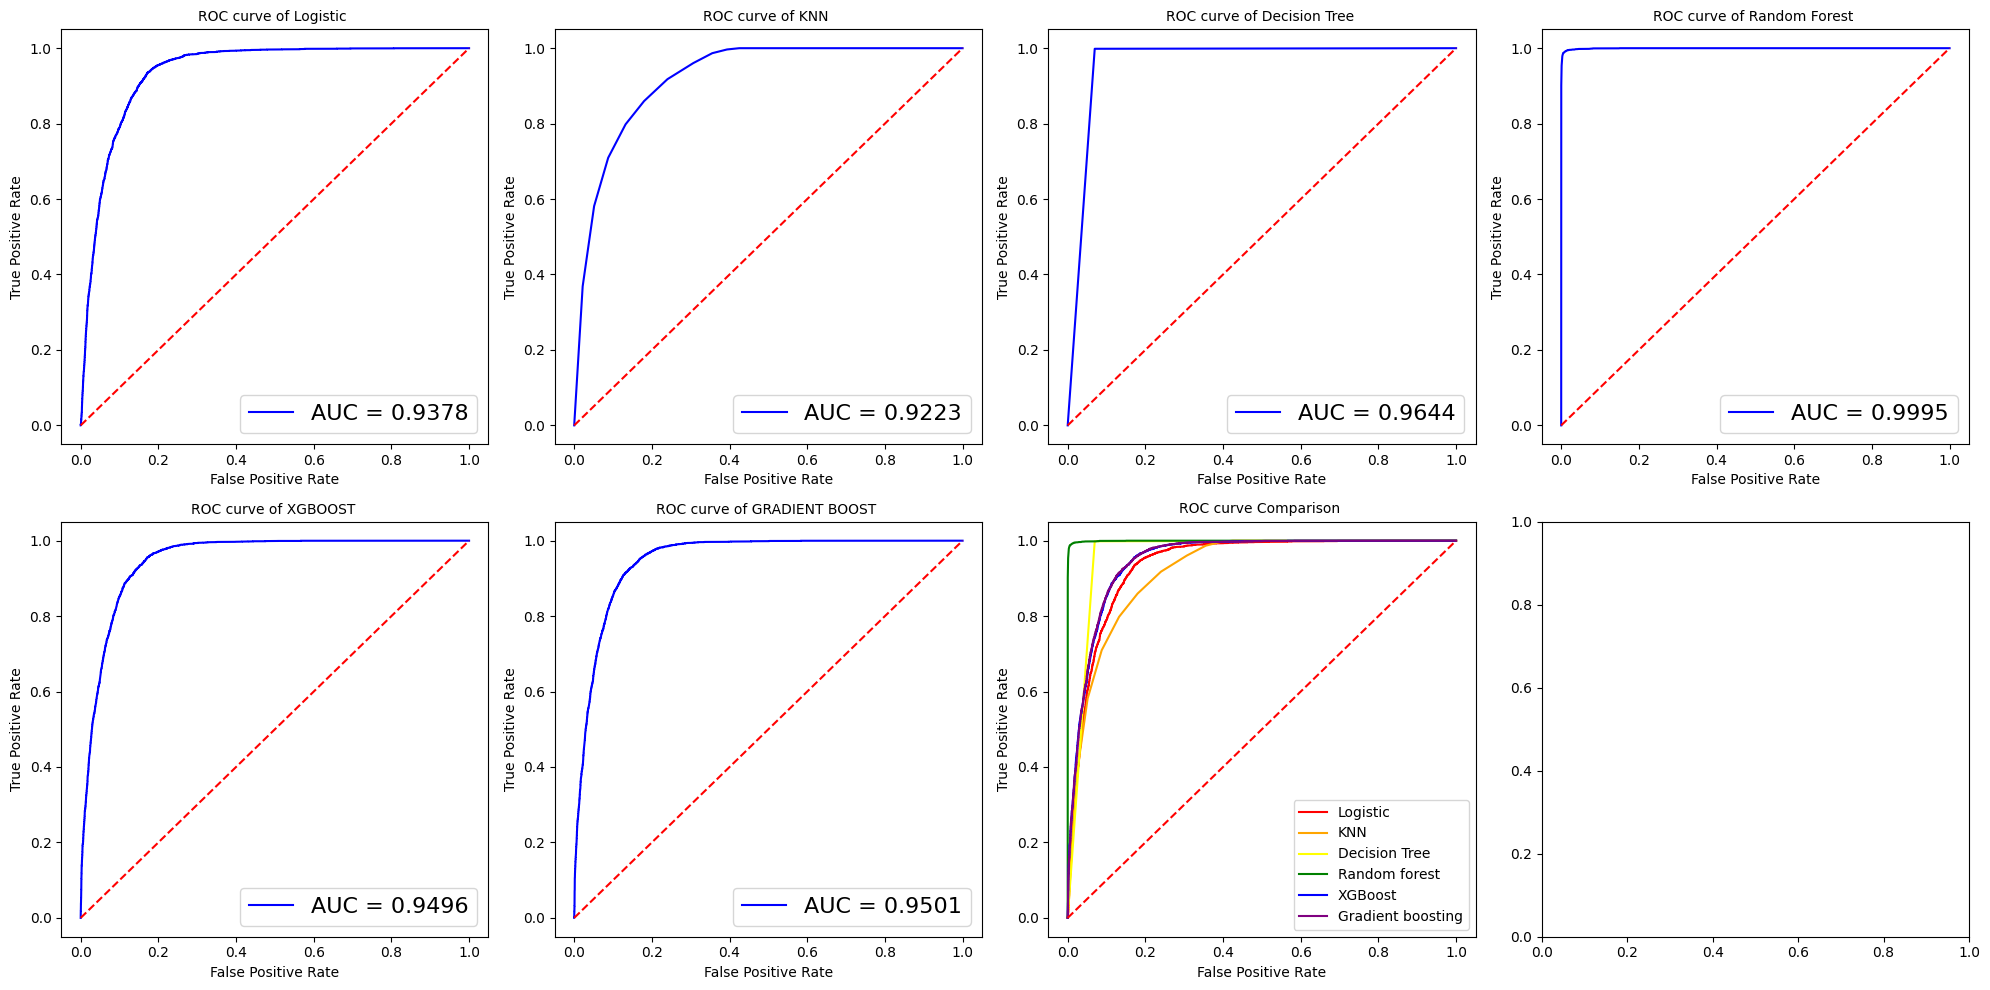

In [ ]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.4f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC curve of Logistic ',fontsize=10)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.4f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC curve of KNN ',fontsize=10)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,2].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.4f' % roc_aucdtree)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC curve of Decision Tree ',fontsize=10)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,3].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.4f' % roc_aucrfc)
ax_arr[0,3].plot([0, 1], [0, 1],'r--')
ax_arr[0,3].set_title('ROC curve of Random Forest ',fontsize=10)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,3].legend(loc = 'lower right', prop={'size': 16})



#XGBOOST
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[1, 0].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.4f' % roc_aucxgb)
ax_arr[1, 0].plot([0, 1], [0, 1],'r--')
ax_arr[1, 0].set_title('ROC curve of XGBOOST ',fontsize=10)
ax_arr[1, 0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1, 0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1, 0].legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gb.predict_proba(X_test)
preds = probs[:,1]
fprgb, tprgb, thresholdgb = metrics.roc_curve(y_test, preds)
roc_aucgb = metrics.auc(fprgb, tprgb)

ax_arr[1,1].plot(fprgb, tprgb, 'b', label = 'AUC = %0.4f' % roc_aucgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC curve of GRADIENT BOOST ',fontsize=10)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='red')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'KNN', color='orange')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='yellow')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random forest', color='green')
ax_arr[1,2].plot(fprxgb, tprxgb, 'b', label = 'XGBoost', color='blue')
ax_arr[1,2].plot(fprgb, tprgb, 'b', label = 'Gradient boosting', color='purple')
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('ROC curve Comparison ',fontsize=10)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [ ]:
result = pd.DataFrame({
    'model':['Logistic regression', 'KNN', 'Decision tree', 'Random forest', 'XGBoost', 'Gradient boosting'],
    'accuracy':[LGCV, KNNCV, DTCV, RFCV, XGBCV, GBCV],
    'precision':[plog, pknn, ptree, prfc, pxgb, pgb],
    'recall':[rlog, rknn, rtree, rrfc, rxgb, rgb],
    'f1score':[f1log, f1knn, f1tree, f1rfc, f1xgb, f1gb],
    'AUC':[roc_auclog, roc_aucknn, roc_aucdtree, roc_aucrfc, roc_aucxgb, roc_aucgb]
})
result

,model,accuracy,precision,recall,f1score,AUC
0,Logistic regression,0.872569,0.8812,0.8587,0.8698,0.937836
1,KNN,0.834258,0.8532,0.8200,0.8363,0.922317
2,Decision tree,0.959695,0.9983,0.9304,0.9632,0.964419
3,Random forest,0.961927,0.9981,0.9298,0.9627,0.999518
4,XGBoost,0.891270,0.9308,0.8420,0.8842,0.949638
5,Gradient boosting,0.891289,0.9266,0.8476,0.8853,0.950088
